# import required module

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pywt
import tensorflow as tf1
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from tensorflow import keras
import warnings
from sklearn import decomposition
warnings.filterwarnings('ignore')

2022-04-26 21:50:59.042139: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib
2022-04-26 21:50:59.042177: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Instructions for updating:
non-resource variables are not supported in the long term


# Load data-set

In [53]:
subcarrier=list(range(53))
label=subcarrier
# label=[subcarrier,'Activity']
df=pd.read_csv("/home/ranjit/Thesis/CSI_dataset/final_dataset/final_ds.csv",names=label)
# df=df.drop(labels=0, axis=0)
# df=df.drop(labels=0, axis=1)
df

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,20.615528,16.763055,13.601471,9.219544,5.099020,5.830952,9.055385,13.000000,17.000000,20.024984,...,10.770330,8.246211,7.000000,6.324555,8.062258,10.000000,10.816654,11.661904,11.704700,Walking
1,18.973666,15.231546,11.704700,8.246211,5.099020,5.000000,8.246211,12.041595,15.132746,18.248288,...,10.000000,8.062258,6.324555,6.000000,7.280110,8.544004,9.486833,10.198039,12.165525,Walking
2,14.866069,17.720045,20.615528,22.203603,23.021729,23.000000,22.022716,20.099751,17.117243,14.142136,...,12.529964,13.892444,14.317821,13.928388,12.649111,11.180340,9.219544,7.071068,5.099020,Walking
3,19.646883,16.278821,12.165525,8.246211,5.000000,5.000000,8.544004,12.529964,15.652476,18.788294,...,9.055385,7.280110,6.708204,5.656854,7.211103,8.944272,9.848858,10.295630,12.041595,Walking
4,14.000000,18.027756,20.099751,22.561028,22.803509,23.409400,21.540659,20.124612,17.000000,14.764823,...,13.341664,14.317821,14.317821,14.142136,13.038405,11.000000,9.000000,6.000000,6.082763,Walking
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2752,22.360680,20.615528,19.313208,16.552945,14.422205,10.630146,7.810250,5.099020,3.605551,5.000000,...,10.440307,11.045361,11.180340,10.440307,9.433981,7.810250,7.211103,6.082763,6.082763,No_activity
2753,3.162278,6.403124,10.630146,13.601471,17.000000,18.384776,20.880613,21.377558,22.022716,22.022716,...,13.152946,11.704700,10.816654,10.630146,10.295630,10.198039,9.055385,9.055385,8.246211,No_activity
2754,23.086793,22.022716,20.099751,18.439089,14.866069,12.083046,8.602325,5.000000,3.162278,3.162278,...,12.000000,11.401754,11.704700,10.816654,10.630146,9.219544,7.615773,6.082763,5.099020,No_activity
2755,22.847319,22.360680,20.248457,17.804494,14.866069,11.401754,8.062258,5.000000,2.828427,4.123106,...,11.180340,11.401754,11.045361,11.045361,10.440307,8.944272,7.810250,5.830952,5.099020,No_activity


# Visualization of dataset

<AxesSubplot:title={'center':'Total number of sample Vs Activity'}>

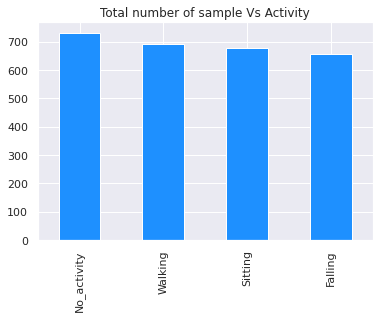

In [3]:
sns.set(color_codes=True)
df[52].value_counts().plot(kind='bar',color="dodgerblue",title='Total number of sample Vs Activity')


In [4]:
df[52].value_counts()

No_activity    731
Walking        692
Sitting        679
Falling        655
Name: 52, dtype: int64

## Analysis of All activity

In [5]:
dataset_amp=df.iloc[:,1:52].values
# dataset_phs=df.iloc[:,52:-1].values

dataset_labels=df.iloc[:,-1]
# Time_stamp=df.iloc[:,0]

Text(0, 0.5, 'Amplitudes')

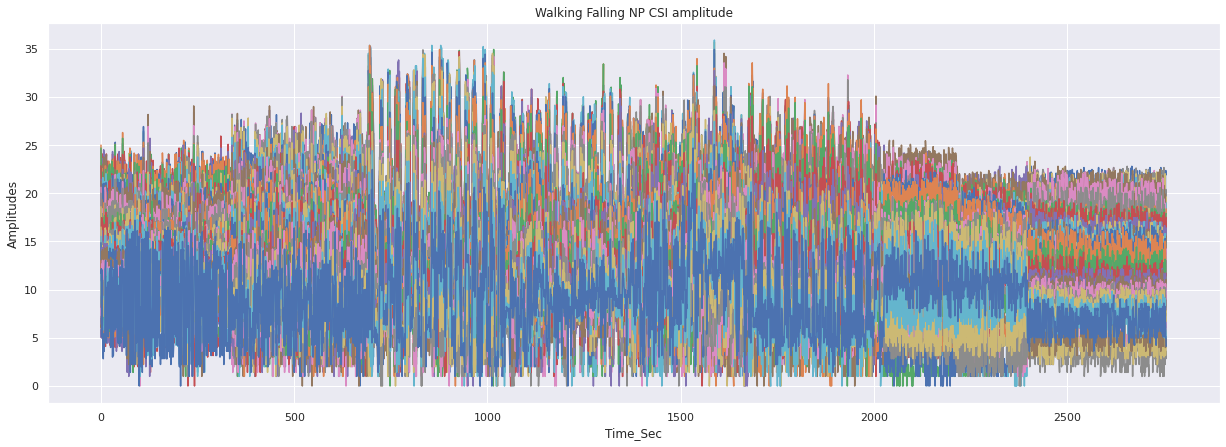

In [6]:
fig = plt.figure(figsize = (21, 7))
plt.plot(dataset_amp)
plt.title("Walking Falling NP CSI amplitude")
plt.xlabel('Time_Sec')
plt.ylabel('Amplitudes')


Text(0.5, 1.0, 'Walking Falling NP CSI amplitude Spectrogram')

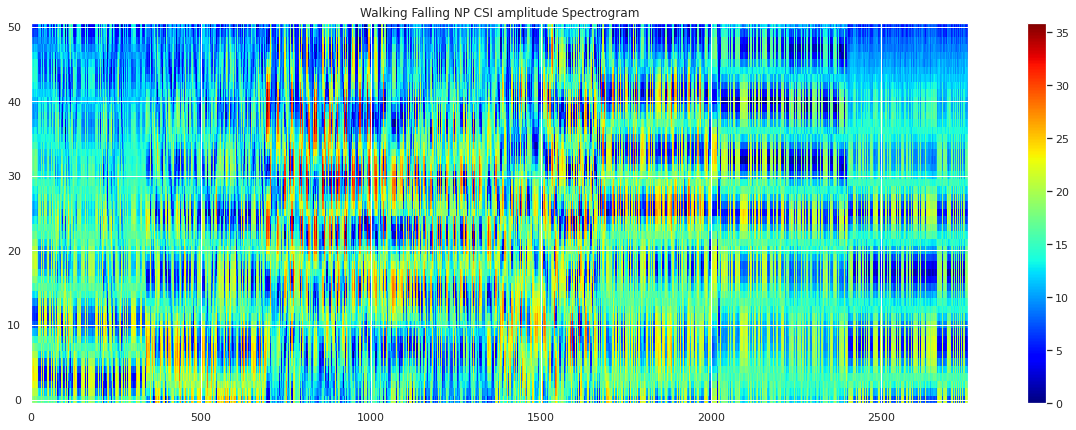

In [7]:
fig = plt.figure(figsize = (21, 7))
im = plt.imshow((dataset_amp).T,interpolation = "nearest", aspect = "auto", cmap="jet", origin='lower')
plt.colorbar()
plt.title("Walking Falling NP CSI amplitude Spectrogram")

# PCA for Dimensionality and Noise redution

## Dimensionality Reduction using PCA

### Mathematically the main objective of PCA is to:
1. Find an orthonormal basis for the data.
2. Sort dimensions in the order of importance.
3. Discard the low significance dimensions.
4. Focus on uncorrelated and Gaussian components.

### Steps involved in PCA
1. Standardize the PCA.
2. Calculate the covariance matrix.
3. Find the eigenvalues and eigenvectors for the covariance matrix.
4. Plot the vectors on the scaled data.

## Amplitude Noise reduction using PCA

(2757, 3)
(2757,)


Text(0, 0.5, 'Amplitudes')

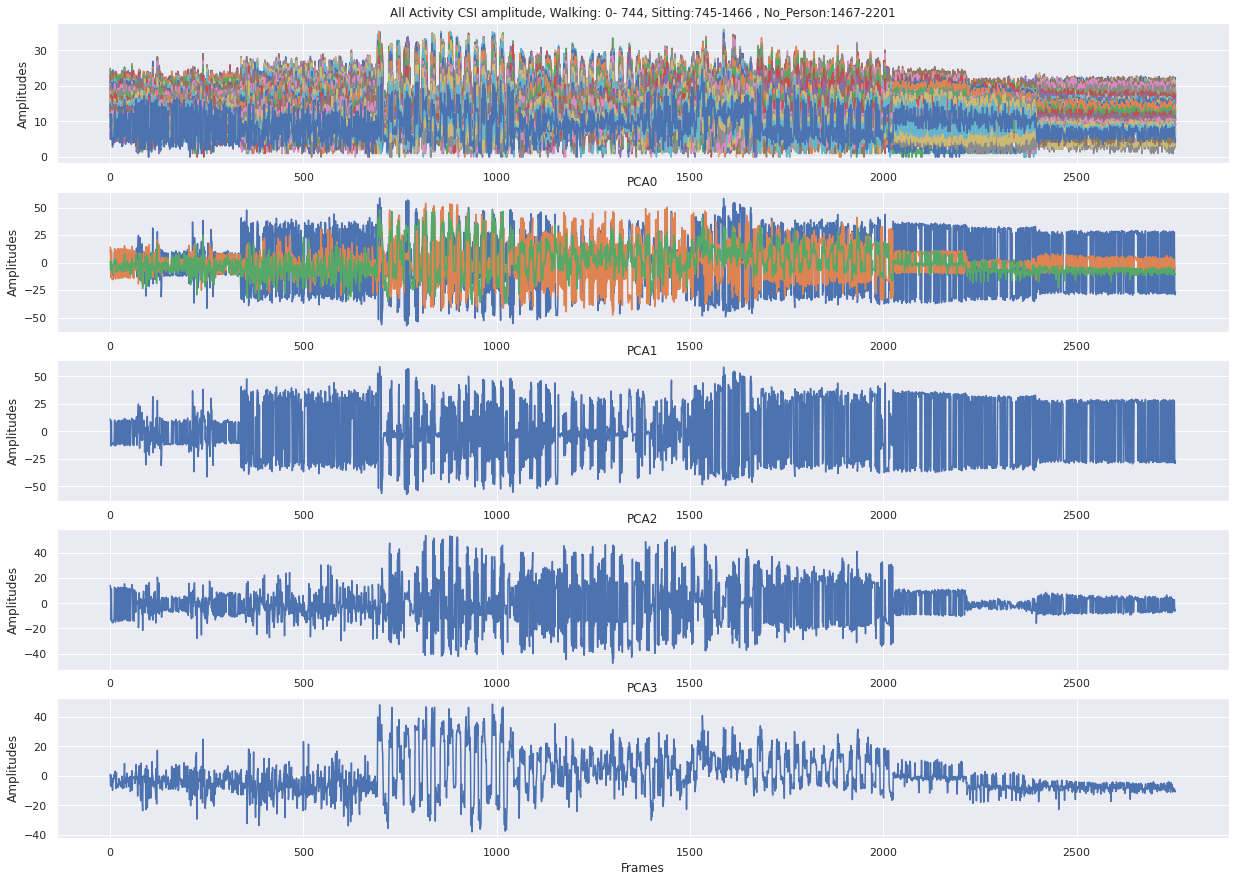

In [8]:

pca = decomposition.PCA(n_components=3)
amp_pca = pca.fit_transform(dataset_amp)

print(amp_pca.shape)
print(amp_pca.T[0].shape)

fig = plt.figure(figsize = (21, 15))
ax = plt.subplot(511)
plt.plot(dataset_amp)
plt.title("All Activity CSI amplitude, Walking: 0- 744, Sitting:745-1466 , No_Person:1467-2201")
plt.ylabel('Amplitudes')

ax1 = plt.subplot(512)
plt.plot(amp_pca)

ax1.set_title("PCA0")
plt.ylabel('Amplitudes')

ax2 = plt.subplot(513)
plt.plot(amp_pca.T[0])
ax2.set_title("PCA1")
plt.ylabel('Amplitudes')

ax3 = plt.subplot(514)
plt.plot(amp_pca.T[1])
ax3.set_title("PCA2")
plt.ylabel('Amplitudes')

ax4 = plt.subplot(515)
plt.plot(amp_pca.T[2])
ax4.set_title("PCA3")
plt.xlabel('Frames')
plt.ylabel('Amplitudes')
# fig.savefig("All_PCA_mag.png")


## Extract PC1 of amp and Phase to make dataset

In [9]:
amp_df1=pd.DataFrame(amp_pca.T[0], columns=["PC1_amp"]) 
# amp_df=amp_df.drop(labels=0, axis=0)
amp_df1

,PC1_amp
0,11.139756
1,9.426112
2,-13.293730
3,9.266830
4,-12.178802
...,...
2752,-28.168600
2753,27.670560
2754,-28.789901
2755,-29.271152


In [10]:
amp_df2=pd.DataFrame(amp_pca.T[1], columns=["PC2_amp"]) 
# amp_df=amp_df.drop(labels=0, axis=0)
amp_df2

,PC2_amp
0,14.170109
1,11.931106
2,-13.469755
3,11.222049
4,-13.746985
...,...
2752,-5.361026
2753,2.767030
2754,-6.311331
2755,-6.010453


In [11]:
amp_df3=pd.DataFrame(amp_pca.T[2], columns=["PC3_amp"]) 
# amp_df=amp_df.drop(labels=0, axis=0)
amp_df3

,PC3_amp
0,1.119922
1,-6.609384
2,0.533897
3,-7.239251
4,-1.482957
...,...
2752,-10.524726
2753,-8.681167
2754,-10.318195
2755,-10.135687


In [12]:
PCA_amp_phs_df = pd.concat([amp_df1,amp_df2,amp_df3, df[[52]]], axis = 1) # , phs_df
PCA_amp_phs_df

,PC1_amp,PC2_amp,PC3_amp,52
0,11.139756,14.170109,1.119922,Walking
1,9.426112,11.931106,-6.609384,Walking
2,-13.293730,-13.469755,0.533897,Walking
3,9.266830,11.222049,-7.239251,Walking
4,-12.178802,-13.746985,-1.482957,Walking
...,...,...,...,...
2752,-28.168600,-5.361026,-10.524726,No_activity
2753,27.670560,2.767030,-8.681167,No_activity
2754,-28.789901,-6.311331,-10.318195,No_activity
2755,-29.271152,-6.010453,-10.135687,No_activity


In [13]:
# PCA_amp_phs_df.to_csv("/home/ranjit/Thesis/CSI_dataset/final_dataset/features_PCA.csv")

In [54]:
df_features=pd.read_csv("/home/ranjit/Thesis/CSI_dataset/final_dataset/All_features.csv")
df_features

,mean_amp,var_amp,std_amp,PC1_amp,PC2_amp,PC3_amp,Activity
0,14.776643,26.573897,5.154988,11.139756,14.170109,1.119922,Walking
1,13.423991,21.873400,4.676901,9.426112,11.931106,-6.609384,Walking
2,14.699300,21.449816,4.631395,-13.293730,-13.469755,0.533897,Walking
3,13.407074,21.788817,4.667849,9.266830,11.222049,-7.239251,Walking
4,14.368804,20.960558,4.578270,-12.178802,-13.746985,-1.482957,Walking
...,...,...,...,...,...,...,...
2752,12.596954,22.835983,4.778701,-28.168600,-5.361026,-10.524726,No_activity
2753,12.993254,25.156126,5.015588,27.670560,2.767030,-8.681167,No_activity
2754,12.690472,24.759610,4.975903,-28.789901,-6.311331,-10.318195,No_activity
2755,12.720652,25.050403,5.005038,-29.271152,-6.010453,-10.135687,No_activity


## Load All features

In [55]:
final_ds_combined=pd.read_csv("/home/ranjit/Thesis/CSI_dataset/final_dataset/final_ds_combined.csv")
final_ds_combined

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,mean_amp,var_amp,std_amp,PC1_amp,PC2_amp,PC3_amp,Activity
0,20.615528,16.763055,13.601471,9.219544,5.099020,5.830952,9.055385,13.000000,17.000000,20.024984,...,10.816654,11.661904,11.704700,14.776643,26.573897,5.154988,11.139756,14.170109,1.119922,Walking
1,18.973666,15.231546,11.704700,8.246211,5.099020,5.000000,8.246211,12.041595,15.132746,18.248288,...,9.486833,10.198039,12.165525,13.423991,21.873400,4.676901,9.426112,11.931106,-6.609384,Walking
2,14.866069,17.720045,20.615528,22.203603,23.021729,23.000000,22.022716,20.099751,17.117243,14.142136,...,9.219544,7.071068,5.099020,14.699300,21.449816,4.631395,-13.293730,-13.469755,0.533897,Walking
3,19.646883,16.278821,12.165525,8.246211,5.000000,5.000000,8.544004,12.529964,15.652476,18.788294,...,9.848858,10.295630,12.041595,13.407074,21.788817,4.667849,9.266830,11.222049,-7.239251,Walking
4,14.000000,18.027756,20.099751,22.561028,22.803509,23.409400,21.540659,20.124612,17.000000,14.764823,...,9.000000,6.000000,6.082763,14.368804,20.960558,4.578270,-12.178802,-13.746985,-1.482957,Walking
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2752,22.360680,20.615528,19.313208,16.552945,14.422205,10.630146,7.810250,5.099020,3.605551,5.000000,...,7.211103,6.082763,6.082763,12.596954,22.835983,4.778701,-28.168600,-5.361026,-10.524726,No_activity
2753,3.162278,6.403124,10.630146,13.601471,17.000000,18.384776,20.880613,21.377558,22.022716,22.022716,...,9.055385,9.055385,8.246211,12.993254,25.156126,5.015588,27.670560,2.767030,-8.681167,No_activity
2754,23.086793,22.022716,20.099751,18.439089,14.866069,12.083046,8.602325,5.000000,3.162278,3.162278,...,7.615773,6.082763,5.099020,12.690472,24.759610,4.975903,-28.789901,-6.311331,-10.318195,No_activity
2755,22.847319,22.360680,20.248457,17.804494,14.866069,11.401754,8.062258,5.000000,2.828427,4.123106,...,7.810250,5.830952,5.099020,12.720652,25.050403,5.005038,-29.271152,-6.010453,-10.135687,No_activity


In [16]:
CSI_Amp=final_ds_combined.iloc[:,:-1].values  # df_features
Activity=final_ds_combined.iloc[:,-1].values 

##  1. Standardizing the features

In [17]:
# from sklearn.preprocessing import StandardScaler
# std = StandardScaler()
# std_features_amp = StandardScaler().fit_transform(amp_pca)


In [18]:
# fig = plt.figure(figsize = (21, 7))
# plt.plot(x)


# Split the dataset into training (70%) and testing (30%)

In [19]:
# Splitting the dataset into training set and test set

from sklearn.model_selection import train_test_split
RANDOM_SEED = 42
X_train,X_test,Y_train,Y_test=train_test_split(CSI_Amp,Activity,test_size=0.30,random_state=RANDOM_SEED)
# X_train, X_test, Y_train, Y_test = train_test_split(reshaped_segments, labels, test_size=0.3, random_state=RANDOM_SEED)


**Features scaling** (optional): in order to improve the performance


In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)


## K-fold cross validation

In [21]:
from sklearn.model_selection import KFold

k = 10
kf = KFold(n_splits=k , shuffle=True, random_state=42)

# Apply ML Model: 
1. KNN
2. SVM
3. Decision Tree
4. Random Forest
5. XGBoost
6. RNN- LSTM

# 1. KNN

KNN Hyperparameters tuning

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

weights=['uniform','distance' ]
n_neighbors = list(range(1,3)) # 30
leaf_size = list(range(1,5)) # 50
algorithm=['auto', 'ball_tree'] # , 'kd_tree', 'brute'
p=[1,2]
metric=['minkowski']
KNN_param=dict(weights=weights, n_neighbors=n_neighbors, leaf_size=leaf_size, algorithm=algorithm, p=p, metric=metric)

# metric: str or callable, default=’minkowski’
# metric_params: dict, default=None

model_KNN=KNeighborsClassifier()

clf_KNN=GridSearchCV(model_KNN, KNN_param, cv=kf, return_train_score=False, refit = True) # , verbose = 3

clf_KNN.fit(X_train_scaler,Y_train)


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree'],
                         'leaf_size': [1, 2, 3, 4], 'metric': ['minkowski'],
                         'n_neighbors': [1, 2], 'p': [1, 2],
                         'weights': ['uniform', 'distance']})

In [23]:
result_KNN=pd.DataFrame(clf_KNN.cv_results_)
result_KNN
result_KNN[['param_algorithm','param_metric','param_n_neighbors','param_weights','mean_test_score','rank_test_score']]

,param_algorithm,param_metric,param_n_neighbors,param_weights,mean_test_score,rank_test_score
0,auto,minkowski,1,uniform,0.964243,25
1,auto,minkowski,1,distance,0.964243,25
2,auto,minkowski,1,uniform,0.968909,1
3,auto,minkowski,1,distance,0.968909,1
4,auto,minkowski,2,uniform,0.962168,49
...,...,...,...,...,...,...
59,ball_tree,minkowski,1,distance,0.968909,1
60,ball_tree,minkowski,2,uniform,0.962168,49
61,ball_tree,minkowski,2,distance,0.964243,25
62,ball_tree,minkowski,2,uniform,0.961650,57


In [24]:
acc_KNN=clf_KNN.best_score_*100
print(f"Accuracy with KNN: {acc_KNN} %")

Accuracy with KNN: 96.89092184801382 %


## K - Fold cross validation Score

In [25]:
from sklearn.model_selection import cross_val_score
kf_KNN=cross_val_score(model_KNN,X_train_scaler, Y_train,cv=kf ,scoring='accuracy')

# Score of K-fold cross validation

kf_KNN.mean()

0.9590511658031089

## Accuracy -- KNN

In [26]:
from sklearn.metrics import accuracy_score
Y_pred_KNN=clf_KNN.predict(X_test_scaler)
accuracy_score(Y_test,Y_pred_KNN)


0.9625603864734299

# Learning Curve

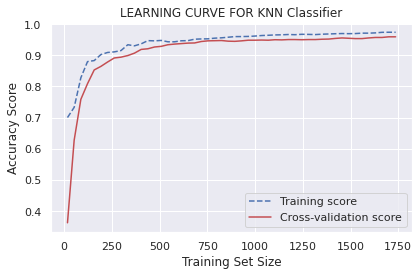

In [27]:
from sklearn.model_selection import learning_curve


# Obtain scores from learning curve function
# cv is the number of folds while performing Cross Validation
sizes, training_scores, testing_scores = learning_curve(model_KNN,X_train_scaler, Y_train, cv=10, scoring='accuracy', train_sizes=np.linspace(0.01, 1.0, 50))
  
# Mean and Standard Deviation of training scores
mean_training = np.mean(training_scores, axis=1)
Standard_Deviation_training = np.std(training_scores, axis=1)
  
# Mean and Standard Deviation of testing scores
mean_testing = np.mean(testing_scores, axis=1)
Standard_Deviation_testing = np.std(testing_scores, axis=1)
  
# dotted blue line is for training scores and green line is for cross-validation score
plt.plot(sizes, mean_training, '--', color="b",  label="Training score")
plt.plot(sizes, mean_testing, color="r", label="Cross-validation score")

# Drawing plot
plt.title("LEARNING CURVE FOR KNN Classifier")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()


## Confusion Matrix -- KNN 

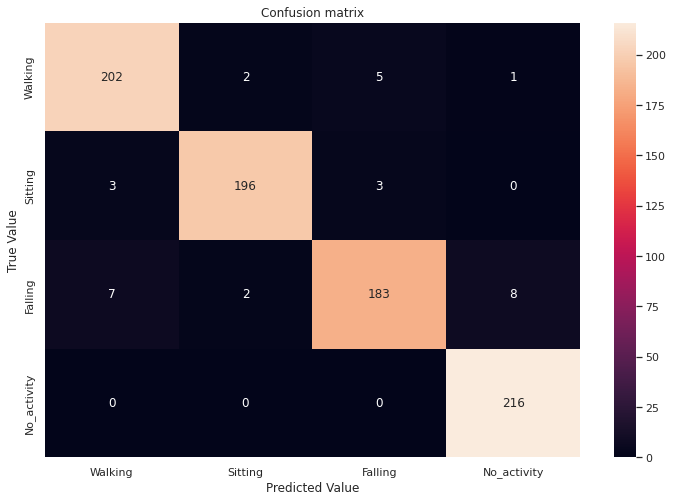

In [28]:
from sklearn.metrics import confusion_matrix

labels = ['Walking','Sitting','Falling','No_activity']
confusion_matrix_KNN = confusion_matrix(Y_test, Y_pred_KNN, labels = ['Walking','Sitting','Falling','No_activity'])

plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix_KNN , xticklabels=labels, yticklabels=labels, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True Value')
plt.xlabel('Predicted Value')
plt.show()

# 2. Support Vector Machine (SVM)

## Hyper Parameter Tuning -- SVM Classifier

In [29]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


SVM_param={'C': [0.1, 1, 10, 100, 1000],
           'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
           'kernel':['rbf','linear']
           }

# refit = True, verbose = 3

model_SVM=SVC()

clf_SVM=GridSearchCV(model_SVM, SVM_param, cv=kf, return_train_score=False, refit = True) # , verbose = 3

clf_SVM.fit(X_train_scaler,Y_train)



GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear']})

In [30]:
acc_SVM=clf_SVM.best_score_*100
print(f"Accuracy with SVM: {acc_SVM} %")


Accuracy with SVM: 97.66758419689118 %


In [31]:
# dir(clf)

In [32]:
result_SVM=pd.DataFrame(clf_SVM.cv_results_)
# result_SVM
# result_SVM[['param_C','param_gamma', 'param_kernel','mean_test_score','rank_test_score']]

## Learning curve - SVR

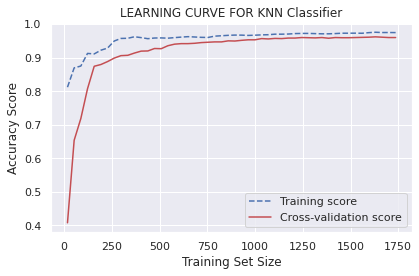

In [33]:
from sklearn.model_selection import learning_curve


# Obtain scores from learning curve function
# cv is the number of folds while performing Cross Validation
sizes, training_scores, testing_scores = learning_curve(model_SVM,X_train_scaler, Y_train, cv=10, scoring='accuracy', train_sizes=np.linspace(0.01, 1.0, 50))
  
# Mean and Standard Deviation of training scores
mean_training = np.mean(training_scores, axis=1)
Standard_Deviation_training = np.std(training_scores, axis=1)
  
# Mean and Standard Deviation of testing scores
mean_testing = np.mean(testing_scores, axis=1)
Standard_Deviation_testing = np.std(testing_scores, axis=1)
  
# dotted blue line is for training scores and green line is for cross-validation score
plt.plot(sizes, mean_training, '--', color="b",  label="Training score")
plt.plot(sizes, mean_testing, color="r", label="Cross-validation score")

# Drawing plot
plt.title("Learning curve for SVC")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

## Score of K-fold cross validation

In [34]:
# from sklearn.model_selection import cross_val_score
# kf_SVM=cross_val_score(clf_SVM, X_train_scaler, Y_train,cv=kf ,scoring='accuracy')

# print(f"SVM K-fold cross validation mean Score: {kf_SVM.mean()*100} %")

## Confusion matrix -- SVM

In [35]:
Y_pred_SVM=clf_SVM.predict(X_test_scaler)

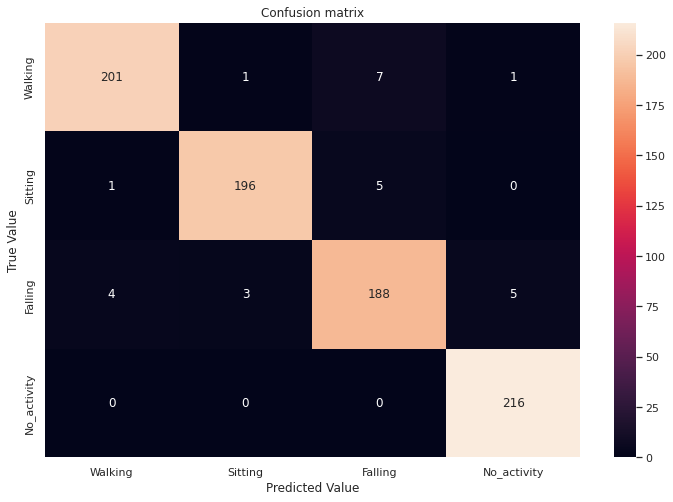

In [36]:

confusion_matrix_SVM = confusion_matrix(Y_test, Y_pred_SVM,labels = ['Walking','Sitting','Falling','No_activity'])

plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix_SVM, xticklabels=labels, yticklabels=labels, annot=True, fmt="d");

plt.title("Confusion matrix")
plt.ylabel('True Value')
plt.xlabel('Predicted Value')
plt.show()

# 3. Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV


DT_param = {"max_depth": [3, None],
            "criterion": ["gini", "entropy"],
            "splitter":['best', 'random'],
            "max_features": ['auto', 'sqrt', 'log2']
              }

# max_depth: int, default=None , min_samples_split: int or float, default=2, min_samples_leaf: int or float, default=1
# max_features: int, float or {“auto”, “sqrt”, “log2”}, default=None

model_DT=DecisionTreeClassifier()

DT_clf = GridSearchCV(model_DT, DT_param, cv = kf ,return_train_score=False, refit = True) # , verbose = 3

DT_clf.fit(X_train_scaler, Y_train)


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']})

In [38]:
result_DT=pd.DataFrame(DT_clf.cv_results_)
# result_DT
result_DT[['param_criterion','param_splitter','param_max_features','rank_test_score','mean_test_score' ]]

,param_criterion,param_splitter,param_max_features,rank_test_score,mean_test_score
0,gini,best,auto,15,0.602888
1,gini,random,auto,21,0.471181
2,gini,best,sqrt,18,0.578543
3,gini,random,sqrt,23,0.461879
4,gini,best,log2,14,0.614813
5,gini,random,log2,24,0.457772
6,gini,best,auto,11,0.880762
7,gini,random,auto,4,0.891640
8,gini,best,sqrt,1,0.896319
9,gini,random,sqrt,6,0.890123


In [39]:
acc_DT = DT_clf.best_score_*100
print(f"Accuracy with DT: {acc_DT} %")


Accuracy with DT: 89.63190846286702 %


In [40]:
Y_pred_DT=DT_clf.predict(X_test_scaler)
DT_clf.score(X_test_scaler, Y_test)

0.8671497584541062

## Learning curve - DT

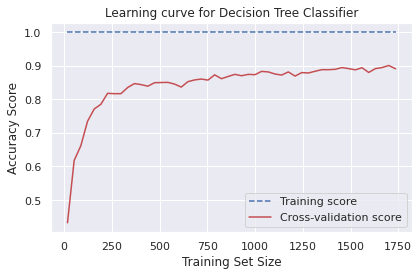

In [50]:
from sklearn.model_selection import learning_curve


# Obtain scores from learning curve function
# cv is the number of folds while performing Cross Validation
sizes, training_scores, testing_scores = learning_curve(model_DT,X_train_scaler, Y_train, cv=10, scoring='accuracy', train_sizes=np.linspace(0.01, 1.0, 50))
  
# Mean and Standard Deviation of training scores
mean_training = np.mean(training_scores, axis=1)
Standard_Deviation_training = np.std(training_scores, axis=1)
  
# Mean and Standard Deviation of testing scores
mean_testing = np.mean(testing_scores, axis=1)
Standard_Deviation_testing = np.std(testing_scores, axis=1)
  
# dotted blue line is for training scores and green line is for cross-validation score
plt.plot(sizes, mean_training, '--', color="b",  label="Training score")
plt.plot(sizes, mean_testing, color="r", label="Cross-validation score")

# Drawing plot
plt.title("Learning curve for Decision Tree Classifier")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

## Confusion matrix -- Decision Tree

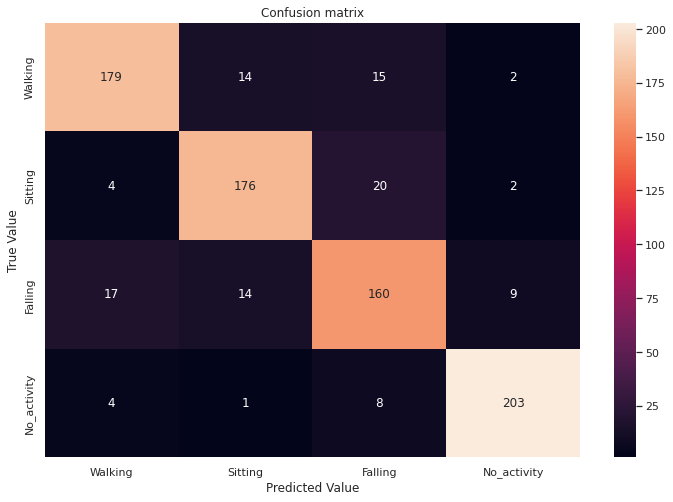

In [41]:
from sklearn.metrics import confusion_matrix

confusion_matrix_DT = confusion_matrix(Y_test, Y_pred_DT, labels = ['Walking','Sitting','Falling','No_activity'])

plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix_DT , xticklabels=labels, yticklabels=labels, annot=True, fmt="d"); # 
plt.title("Confusion matrix")
plt.ylabel('True Value')
plt.xlabel('Predicted Value')
plt.show()

# 4. Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier

model_RF = RandomForestClassifier(n_estimators = 100) 
 
model_RF.fit(X_train, Y_train)
 
Y_pred_RF = model_RF.predict(X_test)
 
from sklearn import metrics 
print()

# using metrics module for accuracy calculation
acc_RF= metrics.accuracy_score(Y_test, Y_pred_RF)*100



In [43]:
print(f"Accuracy with Random Forest: {acc_RF} %")

Accuracy with Random Forest: 93.59903381642512 %


## Learning curve - RF

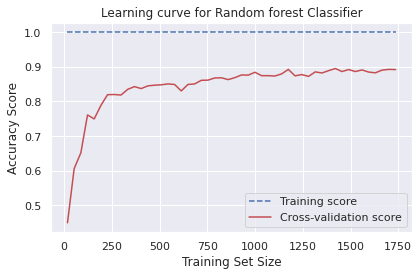

In [51]:
from sklearn.model_selection import learning_curve


# Obtain scores from learning curve function
# cv is the number of folds while performing Cross Validation
sizes, training_scores, testing_scores = learning_curve(model_DT,X_train_scaler, Y_train, cv=10, scoring='accuracy', train_sizes=np.linspace(0.01, 1.0, 50))
  
# Mean and Standard Deviation of training scores
mean_training = np.mean(training_scores, axis=1)
Standard_Deviation_training = np.std(training_scores, axis=1)
  
# Mean and Standard Deviation of testing scores
mean_testing = np.mean(testing_scores, axis=1)
Standard_Deviation_testing = np.std(testing_scores, axis=1)
  
# dotted blue line is for training scores and green line is for cross-validation score
plt.plot(sizes, mean_training, '--', color="b",  label="Training score")
plt.plot(sizes, mean_testing, color="r", label="Cross-validation score")

# Drawing plot
plt.title("Learning curve for Random forest Classifier")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

## Confusion matrix -- Random Forest

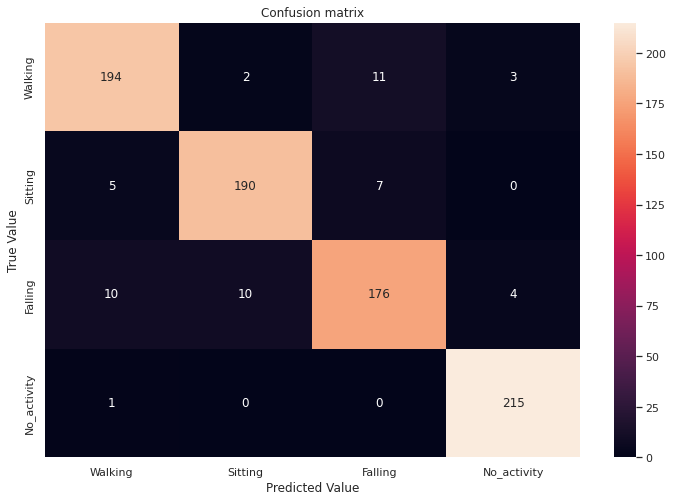

In [44]:
from sklearn.metrics import confusion_matrix

confusion_matrix_RF = confusion_matrix(Y_test, Y_pred_RF, labels = ['Walking','Sitting','Falling','No_activity'])

plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix_RF , xticklabels=labels, yticklabels=labels, annot=True, fmt="d"); # 
plt.title("Confusion matrix")
plt.ylabel('True Value')
plt.xlabel('Predicted Value')
plt.show()

# 5. XGBoost

## Precision, Recall and F1 score

In [45]:
from sklearn.metrics import precision_score , recall_score, f1_score

# Precision Score

# precision_score(Y_test,Y_pred_SVM)


# 6. Building the RNN model -- LSTM
This model contains 2 fully-connected and 2 LSTM layers (stacked on each other) with 64 units each:

In [56]:
df_features

,mean_amp,var_amp,std_amp,PC1_amp,PC2_amp,PC3_amp,Activity
0,14.776643,26.573897,5.154988,11.139756,14.170109,1.119922,Walking
1,13.423991,21.873400,4.676901,9.426112,11.931106,-6.609384,Walking
2,14.699300,21.449816,4.631395,-13.293730,-13.469755,0.533897,Walking
3,13.407074,21.788817,4.667849,9.266830,11.222049,-7.239251,Walking
4,14.368804,20.960558,4.578270,-12.178802,-13.746985,-1.482957,Walking
...,...,...,...,...,...,...,...
2752,12.596954,22.835983,4.778701,-28.168600,-5.361026,-10.524726,No_activity
2753,12.993254,25.156126,5.015588,27.670560,2.767030,-8.681167,No_activity
2754,12.690472,24.759610,4.975903,-28.789901,-6.311331,-10.318195,No_activity
2755,12.720652,25.050403,5.005038,-29.271152,-6.010453,-10.135687,No_activity


In [115]:
L2_LOSS = 0.00025
LEARNING_RATE = 0.00015
num_hidden_layer = 64
num_time_steps = 10
step = 1

# Training param
num_epochs=1000
BATCH_SIZE = 1024

In [116]:
num_classes = 4
num_features=4

Hyperparameter Tuning

# Data Preprocessing

In [117]:
from scipy import stats
segments = []
labels = []
for i in range(0, len(df_features) - num_time_steps, step):
    S0 = df_features['mean_amp'].values[i: i + num_time_steps]
    S1 = df_features['var_amp'].values[i: i + num_time_steps]
    S2 = df_features['std_amp'].values[i: i + num_time_steps]
#     S3 = df_features['PC1_amp'].values[i: i + num_time_steps]
    S4 = df_features['PC2_amp'].values[i: i + num_time_steps]
#     S5 = df_features['PC3_amp'].values[i: i + num_time_steps]

    # S5 = df_features['mean_phs'].values[i: i + num_time_steps]
    # S6 = df_features['var_phs'].values[i: i + num_time_steps]
    # S7 = df_features['std_phs'].values[i: i + num_time_steps]

    
    label = stats.mode(df_features["Activity"][i: i + num_time_steps])[0][0]
    segments.append([S0, S1, S2, S4])

    
    labels.append(label)

In [118]:
np.array(segments).shape

(2747, 4, 10)

# Transfering shape of segment

In [119]:
reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, num_time_steps, num_features)


# One-Hot encoding on label (Walking, Sitting, ....)

In [120]:
labels = np.asarray(pd.get_dummies(labels), dtype = np.float32)
# labels
reshaped_segments.shape


(2747, 10, 4)

In [121]:
XR_train, XR_test, YR_train, YR_test = train_test_split(reshaped_segments, labels, test_size=0.3, random_state=RANDOM_SEED)



# XR_train, XR_test, YR_train, YR_test=train_test_split(CSI_Amp,Activity,test_size=0.30,random_state=RANDOM_SEED)


In [122]:
def create_LSTM_model(inputs):
    W = {
        'hidden': tf1.Variable(tf.random_normal([num_features, num_hidden_layer])),
        'output': tf1.Variable(tf.random_normal([num_hidden_layer, num_classes]))
    }
    biases = {
        'hidden': tf1.Variable(tf.random_normal([num_hidden_layer], mean=1.0)),
        'output': tf1.Variable(tf.random_normal([num_classes]))
    }
    
    X = tf.transpose(inputs, [1, 0, 2])
    X = tf.reshape(X, [-1, num_features])
    hidden = tf.nn.relu(tf.matmul(X, W['hidden']) + biases['hidden'])
    hidden = tf.split(hidden, num_time_steps, 0)

    # Stack 2 LSTM layers
    lstm_layers = [tf.compat.v1.nn.rnn_cell.LSTMCell(num_hidden_layer, forget_bias=1.0) for _ in range(2)]
    
    lstm_layers = tf.keras.layers.StackedRNNCells(lstm_layers)


    outputs, _ = tf.compat.v1.nn.static_rnn(lstm_layers, hidden, dtype=tf.float32)

    # Get output for the last time step
    lstm_last_output = outputs[-1]

    return tf.matmul(lstm_last_output, W['output']) + biases['output']


# Creating Placeholders:

In [123]:
tf.compat.v1.reset_default_graph() # To clear default graph

X = tf.placeholder(tf.float32, [None, num_time_steps, num_features], name="input") # X values that must be feed using feed dict
Y = tf.placeholder(tf.float32, [None, num_classes]) # Y values that must be feed using feed dict

In [124]:
pred_Y = create_LSTM_model(X)
pred_softmax = tf.nn.softmax(pred_Y, name="y_")

In [125]:
l2 = L2_LOSS * \
    sum(tf.nn.l2_loss(tf_var) for tf_var in tf.trainable_variables())

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = pred_Y, labels = Y)) + l2

In [126]:

optimizer = tf.train.AdamOptimizer(learning_rate=LEARNING_RATE).minimize(loss)

correct_pred = tf.equal(tf.argmax(pred_softmax, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, dtype=tf.float32))


# Training

In [127]:
saver = tf.train.Saver()

history = dict(train_loss=[], 
                     train_acc=[], 
                     test_loss=[], 
                     test_acc=[])

sess=tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

train_count = len(XR_train)

for i in range(1, num_epochs + 1):
    for start, end in zip(range(0, train_count, BATCH_SIZE),range(BATCH_SIZE, train_count + 1,BATCH_SIZE)):
        sess.run(optimizer, feed_dict={X: XR_train[start:end],
                                       Y: YR_train[start:end]})

    _, acc_train, loss_train = sess.run([pred_softmax, accuracy, loss], feed_dict={ X: XR_train, Y: YR_train})

    _, acc_test, loss_test = sess.run([pred_softmax, accuracy, loss], feed_dict={ X: XR_test, Y: YR_test})

    history['train_loss'].append(loss_train)
    history['train_acc'].append(acc_train)
    history['test_loss'].append(loss_test)
    history['test_acc'].append(acc_test)

    if i != 1 and i % 100 != 0:
        continue

    print(f'epoch: {i} test accuracy: {acc_test*100}% loss: {loss_test}')
    
predictions, acc_RNN_final, loss_final = sess.run([pred_softmax, accuracy, loss], feed_dict={X: XR_test, Y: YR_test})

print()
# Convert acc in percent
acc_RNN = acc_RNN_final*100
print(f'final results: accuracy: {acc_RNN}% loss: {loss_final}')


epoch: 1 test accuracy: 26.787880063056946% loss: 1.819521427154541
epoch: 100 test accuracy: 72.36363887786865% loss: 0.8398195505142212
epoch: 200 test accuracy: 81.69696927070618% loss: 0.6711434125900269
epoch: 300 test accuracy: 82.06060528755188% loss: 0.7361147403717041
epoch: 400 test accuracy: 82.06060528755188% loss: 0.7798599600791931
epoch: 500 test accuracy: 83.15151333808899% loss: 0.8080960512161255
epoch: 600 test accuracy: 83.27272534370422% loss: 0.8198267221450806
epoch: 700 test accuracy: 83.75757336616516% loss: 0.8252395391464233
epoch: 800 test accuracy: 84.2424213886261% loss: 0.8251612186431885
epoch: 900 test accuracy: 84.2424213886261% loss: 0.8262353539466858
epoch: 1000 test accuracy: 84.84848737716675% loss: 0.8269988298416138

final results: accuracy: 84.84848737716675% loss: 0.8269988298416138


# Evaluation

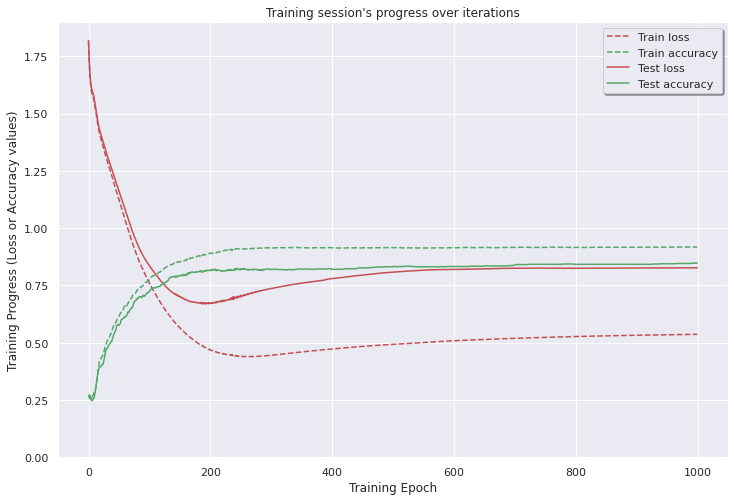

In [128]:
plt.figure(figsize=(12, 8))

plt.plot(np.array(history['train_loss']), "r--", label="Train loss")
plt.plot(np.array(history['train_acc']), "g--", label="Train accuracy")

plt.plot(np.array(history['test_loss']), "r-", label="Test loss")
plt.plot(np.array(history['test_acc']), "g-", label="Test accuracy")

plt.title("Training session's progress over iterations")
plt.legend(loc='upper right', shadow=True)
plt.ylabel('Training Progress (Loss or Accuracy values)')
plt.xlabel('Training Epoch')
plt.ylim(0)

plt.show()

## Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix

max_test = np.argmax(YR_test, axis=1)
max_predictions = np.argmax(predictions, axis=1)

labels = ['Walking','Sitting','Falling','No_activity']
confusion_matrix_RNN = confusion_matrix(max_test, max_predictions)


plt.figure(figsize=(12, 8))

sns.heatmap(confusion_matrix_RNN, xticklabels=labels, yticklabels=labels, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True Value')
plt.xlabel('Predicted Value')
plt.show()

In [ ]:
# max_predictions

# LSTM --2nd method

In [ ]:
# final_df

In [ ]:
# df = np.fft.ifft(final_df.iloc[:, 0:1])
df_features = df_features.iloc[1:-1, :]
df_features

In [ ]:
def wavelet_transform(final_df,col):
  df = np.fft.ifft(final_df.iloc[:, col])
  c = pywt.wavedec(df, 'db8', mode='symmetric', level=3)
  return np.abs(c)
  
def approx_coeff(coeff):
  C3 = np.mean(coeff[0])
  return C3

def wavelet_coeff(coeff):
  D3 = np.mean(coeff[1])
  D2 = np.mean(coeff[2])
  D1 = np.mean(coeff[3])
  return D3, D2, D1 #D3*10000, D2*10000, D1*10000

In [ ]:
# wt=wavelet_transform(df_features,1)
# wt_lis=list(wt[0])
# len(wt_lis)

In [ ]:
import seaborn as sns
from numpy import array
from numpy import argmax
from keras.layers.core import Dense, Activation, Dropout
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.layers import Flatten


In [ ]:
# Import label encoder
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df_features['Activity']= label_encoder.fit_transform(df_features['Activity'])


In [ ]:
CSI_Amp=df_features.iloc[:,:2].values
Activity=df_features.iloc[:,-1].values

# Split the dataset into training (70%) and testing (30%)

In [ ]:
from sklearn.model_selection import train_test_split
RANDOM_SEED = 42
# XL_train, XL_test, YL_train, YL_test = train_test_split(CSI_Amp, final_df['Activity'], test_size=0.3, random_state=RANDOM_SEED)
XL_train, XL_test, YL_train, YL_test = train_test_split(CSI_Amp, Activity, test_size=0.3, random_state=RANDOM_SEED)

# X_train, X_test, Y_train, Y_test = train_test_split(reshaped_segments, labels, test_size=0.3, random_state=RANDOM_SEED)


**Features scaling** (optional): in order to improve the performance


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
XL_train_scaler = scaler.fit_transform(XL_train)
XL_test_scaler = scaler.transform(XL_test)

In [ ]:
# YL_train=YL_train.values.tolist()
# YL_train_scaler=np.asarray(YL_train_scaler)

In [ ]:
model_LSTM=Sequential([
    Dense(256,activation='relu'),     #adding first hidden layer
    Dense(128,activation='relu'),     #adding second hidden layer
    Dense(64,activation='relu'),      #adding third hidden layer
    Dense(10,activation='softmax'),     #adding output layer

])


# LSTM_clf = GridSearchCV(model_LSTM, param_LSTM, cv = kf ,return_train_score=False, refit = True) # , verbose = 3

model_LSTM.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model_LSTM.fit(XL_train, YL_train, validation_data=(XL_test,YL_test) ,epochs=1000,batch_size=64)

In [ ]:
Y_pred_LSTM=model_LSTM.predict(XL_test)

In [ ]:
# 6. model.evaluate
results = model_LSTM.evaluate(XL_test,YL_test)
results
# Test loss, Test Acc

In [ ]:
# 1. model.score

# model_LSTM.score(XL_test, YL_test)

In [ ]:
# 2. using metrics module for accuracy calculation
 
from sklearn import metrics 

# acc_LSTM= metrics.accuracy_score(YL_test, Y_pred_LSTM)

In [ ]:
# 3. best_score_  --> Hyper parameter -- Grid search

# acc_LSTM = model_LSTM.best_score_*100
# print(f"Accuracy with LSTM: {acc_LSTM} %")

In [ ]:
# 4. accuracy_score

from sklearn.metrics import accuracy_score
# accuracy_score(YL_test,Y_pred_LSTM)

# 5. K-fold cross validation:  cross_val_score

from sklearn.model_selection import cross_val_score
# kf_LSTM=cross_val_score(model_LSTM,XL_train, YL_train,cv=kf ,scoring='accuracy')
# kf_LSTM.mean()

# Accuracy for different ML classifier model

In [129]:
print(f"1. Accuracy with K-Nearest Neighbour(KNN): {acc_KNN} % \n")
print(f"2. Accuracy with Support Vector Classifier: {acc_SVM} % \n")
print(f"3. Accuracy with Decision Tree: {acc_DT} % \n")
print(f"4. Accuracy with Random Forest: {acc_RF} % \n")
print(f"5. Accuracy with Recurrent Neural Network(RNN) : {acc_RNN} % \n")

1. Accuracy with K-Nearest Neighbour(KNN): 96.89092184801382 % 

2. Accuracy with Support Vector Classifier: 97.66758419689118 % 

3. Accuracy with Decision Tree: 89.63190846286702 % 

4. Accuracy with Random Forest: 93.59903381642512 % 

5. Accuracy with Recurrent Neural Network(RNN) : 84.84848737716675 % 

